# WeatherPy
----

### Analysis
* We can visually see it is true, as you approach the equator, temperatures are warmer. There were a few outliers that have low temperatures near 0 degrees latitude. From the Latitude vs Temp plot you can see heavier distribution on latitudes further away as northern hemisphere is approaching winter soon.
* From Latitude vs Humidity plot, humidity also seems to be higher as you approach equator. But also, there seems to be a lot more humid cities in the northern hemisphere vs southern hemisphere right now. Probably has to do with a lot of rain and huricanes going on right now in northern hemisphere.
* Cloudiness doesnt seem to matter as you near equator. Data is spread out all over. Seems to be cloudy in both southern and northern hemispheres no matter if its winter or summer time.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities_output_weatherpy.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create list to store city dat
city_data = []

#create url to use
url = "http://api.openweathermap.org/data/2.5/weather?"
#set unit type to use
unit = "imperial"

#print starting text of data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")

#create counters for record and set
record_counter = 1
set_counter = 1

# loop throught the list of cities
for city in cities:
    
    #create if statement to group cities in sets of 50
    if record_counter == 50:
        record_counter = 1
        set_counter += 1
        
    
    #query url as you loop through each city
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + unit
    
    #request and get weather data
    city_weather_response = requests.get(query_url)
    
    #print log of city number and the set number
    print(f"Processing Record {record_counter} of Set {set_counter} | {city}") 
    record_counter += 1
    
    
    #try and except to skp over city not found
    try: 
        
        #convert city weather response to json
        city_weather_json = city_weather_response.json()
        
        #get the cloudiness, country, date, humidity, lat, lng, max temp, wind speed from JSON response
        city_cloudiness = city_weather_json["clouds"]["all"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_wind_speed = city_weather_json["wind"]["speed"]
        
        #append retrieved data to dictionary to store
        city_data.append({"City": city, 
                          "Cloudiness": city_cloudiness, 
                          "Country": city_country, 
                          "Date": city_date, 
                          "Humidity": city_humidity, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp, 
                          "Wind Speed": city_wind_speed})
        
    except KeyError:
        print("City not found. Skipping...")

#print complete of data retrieval         
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | sterling
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | rognan
Processing Record 5 of Set 1 | parkes
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | ilhabela
Processing Record 12 of Set 1 | astana
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | biloela
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | samusu
City not found. Skipping...
Processing Record 18 of Set 1 | vardo
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | lasa
Processing Record 23 of Set 1 | beidao
Process

Processing Record 39 of Set 4 | coquimbo
Processing Record 40 of Set 4 | dali
Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | vila do maio
Processing Record 44 of Set 4 | honiara
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | mayo
Processing Record 48 of Set 4 | matay
Processing Record 49 of Set 4 | mirpur mathelo
Processing Record 1 of Set 5 | portland
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | trinidad
Processing Record 4 of Set 5 | orje
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | paranavai
Processing Record 7 of Set 5 | le port
Processing Record 8 of Set 5 | tuskegee
Processing Record 9 of Set 5 | souillac
Processing Record 10 of Set 5 | vila franca do campo
Processing Record 11 of Set 5 | tiruvallur
Processing Record 12 of Set 5 | vershino-darasunskiy
Processing Record 13 of Set 5 | krasnoborsk

Processing Record 30 of Set 8 | clyde river
Processing Record 31 of Set 8 | dobryanka
Processing Record 32 of Set 8 | marawi
Processing Record 33 of Set 8 | kermanshah
Processing Record 34 of Set 8 | khandyga
Processing Record 35 of Set 8 | zempoala
Processing Record 36 of Set 8 | biskamzha
Processing Record 37 of Set 8 | sao filipe
Processing Record 38 of Set 8 | soskovo
Processing Record 39 of Set 8 | trelleborg
Processing Record 40 of Set 8 | margate
Processing Record 41 of Set 8 | maturin
Processing Record 42 of Set 8 | haines junction
Processing Record 43 of Set 8 | sinnamary
Processing Record 44 of Set 8 | fairbanks
Processing Record 45 of Set 8 | khatanga
Processing Record 46 of Set 8 | marcona
City not found. Skipping...
Processing Record 47 of Set 8 | shitkino
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Set 8 | igboho
Processing Record 1 of Set 9 | kirakira
Processing Record 2 of Set 9 | rocha
Processing Record 3 of Set 9 | havre-saint-pierre
Processing Re

Processing Record 22 of Set 12 | homer
Processing Record 23 of Set 12 | puerto madero
Processing Record 24 of Set 12 | bud
Processing Record 25 of Set 12 | auki
Processing Record 26 of Set 12 | tumbi
Processing Record 27 of Set 12 | basco
Processing Record 28 of Set 12 | van
Processing Record 29 of Set 12 | gadwal
Processing Record 30 of Set 12 | kuusankoski
Processing Record 31 of Set 12 | barmer
Processing Record 32 of Set 12 | zell am see
Processing Record 33 of Set 12 | mount pleasant
Processing Record 34 of Set 12 | walvis bay
Processing Record 35 of Set 12 | shelburne
Processing Record 36 of Set 12 | krasnyy chikoy
Processing Record 37 of Set 12 | asau
City not found. Skipping...
Processing Record 38 of Set 12 | korla
City not found. Skipping...
Processing Record 39 of Set 12 | rio pardo de minas
Processing Record 40 of Set 12 | beloha
Processing Record 41 of Set 12 | praxedis guerrero
Processing Record 42 of Set 12 | ayame
Processing Record 43 of Set 12 | parabel
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#convert raw data to a DataFrame
city_data_df = pd.DataFrame(city_data)


#export the city data into a csv file
city_data_df.to_csv(output_data_file)

#display the DataFrame count
city_data_df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [5]:
#create axises for scatter plot
x_lat = city_data_df["Lat"]
y_temps = city_data_df["Max Temp"]
y_humidity = city_data_df["Humidity"]
y_cloudiness = city_data_df["Cloudiness"]
y_wind_speed = city_data_df["Wind Speed"]

city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sterling,40,US,1538248500,53,39.00,-77.40,80.06,8.05
1,chokurdakh,88,RU,1538250516,96,70.62,147.90,28.63,13.80
2,rikitea,32,PF,1538250517,100,-23.12,-134.97,72.73,12.68
3,rognan,75,NO,1538248800,87,67.10,15.40,44.60,12.75
4,parkes,0,AU,1538250517,75,-33.14,148.18,42.67,2.73


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

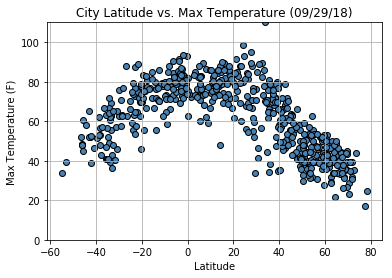

In [6]:
#create scatter plots and properties
plt.scatter(x_lat, y_temps, marker="o", facecolors="steelblue", edgecolors="black", label="Temp")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,110)
plt.grid()


#save figures to file
plt.savefig("LatVsTemp.png")

#show plot
plt.show()

#### Latitude vs. Humidity Plot

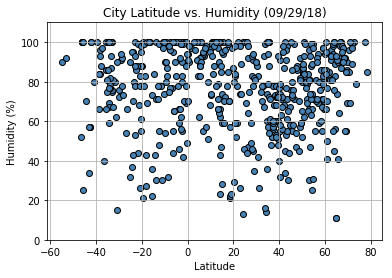

In [7]:
#create scatter plots and properties
plt.scatter(x_lat, y_humidity, marker="o", facecolors="steelblue", edgecolors="black", label="Humidity")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,110)
plt.grid()


#save figures to file
plt.savefig("LatVsHumidity.png")

#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

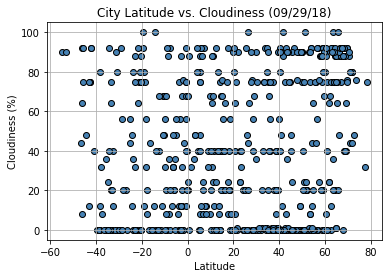

In [8]:
#create scatter plots and properties
plt.scatter(x_lat, y_cloudiness, marker="o", facecolors="steelblue", edgecolors="black", label="Cloudiness")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


#save figures to file
plt.savefig("LatVsCloudiness.png")

#show plot
plt.show()

#### Latitude vs. Wind Speed Plot

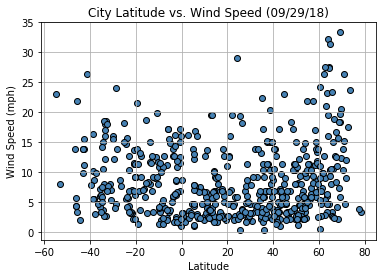

In [9]:
#create scatter plots and properties
plt.scatter(x_lat, y_wind_speed, marker="o", facecolors="steelblue", edgecolors="black", label="Wind Speed")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()


#save figures to file
plt.savefig("LatVsWindSpeed.png")

#show plot
plt.show()